# Graph Analysis Techniques without Feature Learning

# Dimensionality reduction with graphs

## Lab 5 : T-SNE

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML_May23_codes/codes/03_Traditional_GML/04_dim_reduc'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_pca
from lib.utils import construct_knn_graph
from lib.utils import nldr_visualization
from lib.utils import construct_kernel

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# t-SNE visualization
from sklearn.manifold import TSNE

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

1000 1600 40 40


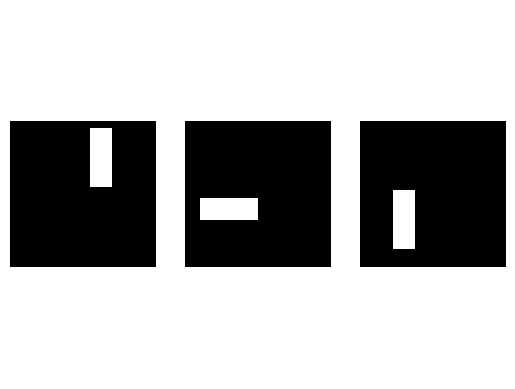

In [3]:
# Horizontal and vertical rectangles
mat = scipy.io.loadmat('datasets/rectangles.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Ny = mat['Ny'].squeeze()
Nx = mat['Nx'].squeeze()
Cgt = mat['Cgt'].squeeze()
print(n,d,Nx,Ny)

plt.figure(1)
rotated_img = scipy.ndimage.rotate(np.reshape(X[0,:],[Nx,Ny]), 0)
plt.subplot(131).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[678,:],[Nx,Ny]), 0)
plt.subplot(132).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[260,:],[Nx,Ny]), 0)
plt.subplot(133).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
plt.show()

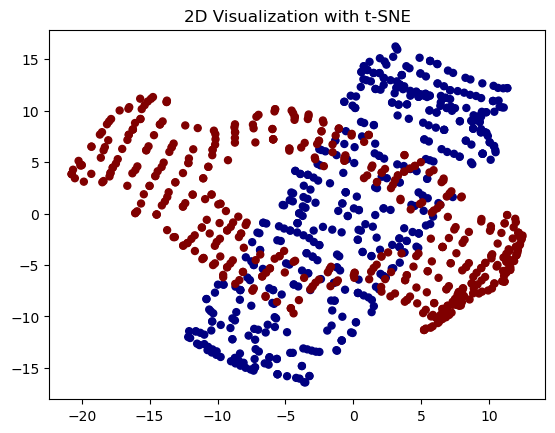

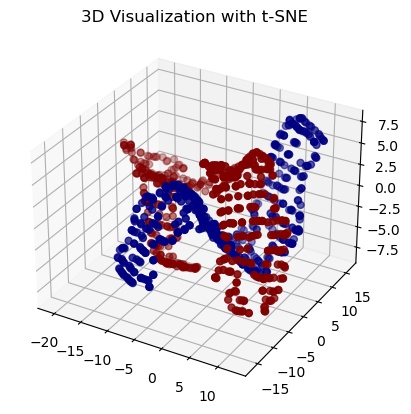

In [4]:
# Run t-SNE (long, initialization-dependent)
#model = TSNE(n_components=3, learning_rate=300, n_iter=10000, random_state=0)
model = TSNE(n_components=3, learning_rate=200, n_iter=10000, random_state=np.random.randint(n))
np.set_printoptions(suppress=True)
XtSNE = model.fit_transform(X) # Xtsne = n x d
Xtsne = XtSNE[:,0]
Ytsne = XtSNE[:,1]
Ztsne = XtSNE[:,2]

# 2D Plot
plt.figure(2)
size_vertex_plot = 25
plt.scatter(Xtsne, Ytsne, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('2D Visualization with t-SNE') 
plt.show()

# 3D Plot
fig = pylab.figure(3)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 25
ax.scatter(Xtsne, Ytsne, Ztsne, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('3D Visualization with t-SNE') 
pyplot.show() 

1000 784 28 28


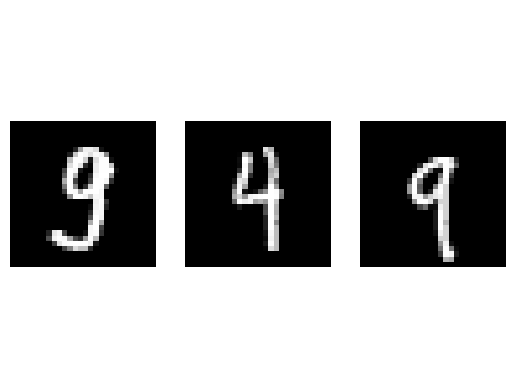

In [5]:
# MNIST: 4's and 9's
mat = scipy.io.loadmat('datasets/mnist_4s_9s_1000.mat')
X = mat['Traw']
n = X.shape[0]
d = X.shape[1]
Ny = 28
Nx = 28
Cgt = mat['Cgt'].squeeze()
print(n,d,Nx,Ny)

plt.figure(10)
rotated_img = scipy.ndimage.rotate(np.reshape(X[50,:],[Nx,Ny])[::-1,:], -90)
plt.subplot(131).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[68,:],[Nx,Ny])[::-1,:], -90)
plt.subplot(132).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[260,:],[Nx,Ny])[::-1,:], -90)
plt.subplot(133).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
plt.show()

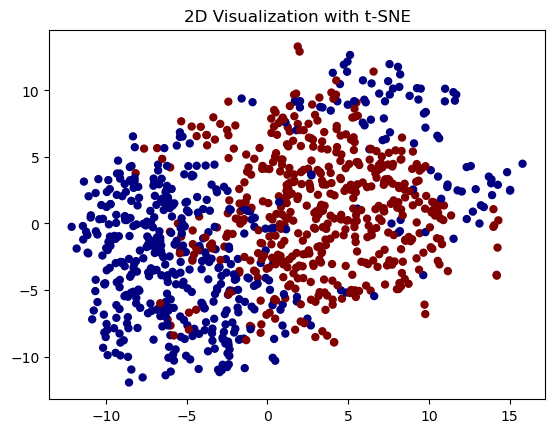

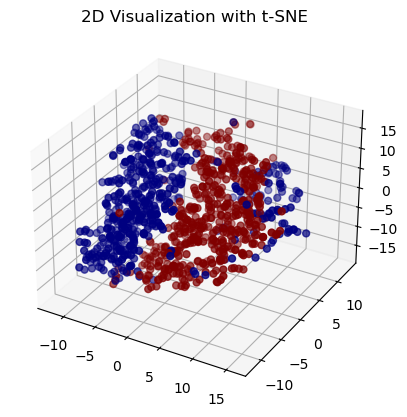

In [6]:
# Run t-SNE
model = TSNE(n_components=3, learning_rate=200, n_iter=10000, random_state=np.random.randint(n))
np.set_printoptions(suppress=True)
XtSNE = model.fit_transform(X) # Xtsne = n x d
Xtsne = XtSNE[:,0]
Ytsne = XtSNE[:,1]
Ztsne = XtSNE[:,2]

# 2D Plot
plt.figure(11)
size_vertex_plot = 25
plt.scatter(Xtsne, Ytsne, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('2D Visualization with t-SNE') 
plt.show()

# 3D Plot
fig = pylab.figure(12)
ax = fig.add_subplot(projection='3d')
size_vertex_plot = 25
ax.scatter(Xtsne, Ytsne, Ztsne, s=size_vertex_plot*np.ones(n), c=Cgt, color=pyplot.jet())
plt.title('2D Visualization with t-SNE') 
pyplot.show() 